In [22]:
import pandas as pd

# train_path = "data/train.csv"
# val_path = "data/valid.csv"
# test_path = "data/down_test.csv"

# train_path = "data/up_train.csv"
# val_path = "data/up_valid.csv"
# test_path = "data/up_test.csv"

train_path = "data/down_train.csv"
val_path = "data/down_valid.csv"
test_path = "data/down_test.csv"

# train_path = "data/ViCTSD_train.csv"
# val_path = "data/ViCTSD_valid.csv"
# test_path = "data/ViCTSD_test.csv"

# Tải dữ liệu
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

# # Xóa các cột không cần thiết và đổi tên cột
# columns_to_drop = ["Title", "Topic", "Unnamed: 0", "Constructiveness"]
# for df in [train_df, val_df, test_df]:
#     df.drop(columns=columns_to_drop, inplace=True)
#     df.rename(columns={"Toxicity": "label", "Comment": "text"}, inplace=True)

# Thêm cột 'set' để phân biệt các tập dữ liệu
train_df['set'] = 'train'
val_df['set'] = 'val'
test_df['set'] = 'test'

# Gộp các tập dữ liệu lại thành 1 DataFrame duy nhất
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [23]:
df

,text,label,set
0,"Biển không thể lên thăm cầu vồng, còn cầu vồng...",0,train
1,Tin vui nhất trong ngày!!!,0,train
2,Không đẹp nhưng nhiu options,0,train
3,Cá nhân tôi càng thấy các cô muôn phần đẹp hơn...,0,train
4,Sevilla thắng loạt đá luân lưu 5-4,0,train
...,...,...,...
2977,biệt thự nhà riêng to đùng thế kia mà chủ (hay...,1,test
2978,"Trong cái khó ló cái khôn, người tài thật sự k...",0,test
2979,Bánh trung thu sao lại phải có quả trứng muối ...,0,test
2980,Cấp 1 nói chung và lớp 1 nói riêng theo tôi có...,0,test


In [24]:
from collections import Counter
# Tách từ từ cột 'text' và gộp tất cả lại
all_words = []
for text in df['text']:
    all_words.extend(text.split())

# Đếm số lượng từ và in ra số lượng từ duy nhất
word_count = Counter(all_words)

# In số lượng từ trong bộ từ điển
print(f"Số lượng từ trong bộ từ điển: {len(word_count)}")

Số lượng từ trong bộ từ điển: 10218


In [25]:
word_count.most_common(10)

[('là', 1231),
 ('có', 1169),
 ('không', 1013),
 ('thì', 857),
 ('và', 793),
 ('người', 717),
 ('cho', 655),
 ('mà', 634),
 ('này', 554),
 ('của', 554)]

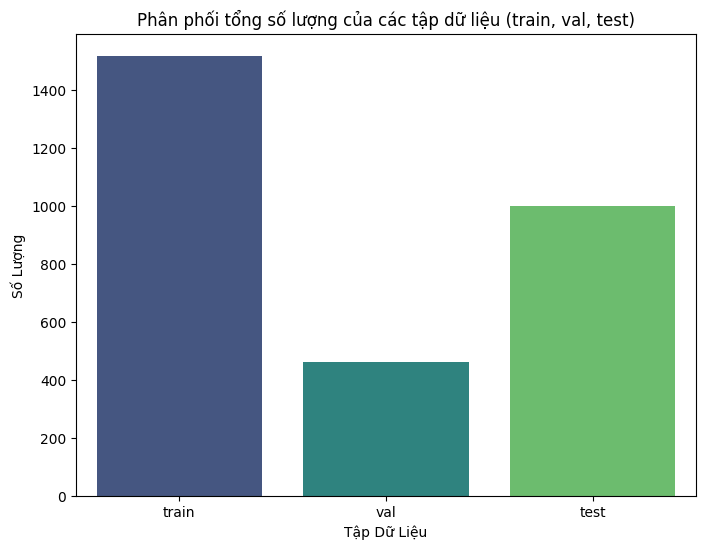

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có cột 'set' phân biệt các tập dữ liệu (train, val, test)
# Nếu chưa, bạn cần thêm cột này vào df.

# Ví dụ:
# df['set'] = ['train', 'val', 'test']  # Phân chia theo cách thủ công hoặc sử dụng sklearn

# Vẽ biểu đồ phân phối tổng số lượng của từng tập (train, val, test)
plt.figure(figsize=(8, 6))
sns.countplot(x='set', data=df, palette='viridis')
plt.title('Phân phối tổng số lượng của các tập dữ liệu (train, val, test)')
plt.xlabel('Tập Dữ Liệu')
plt.ylabel('Số Lượng')
plt.show()


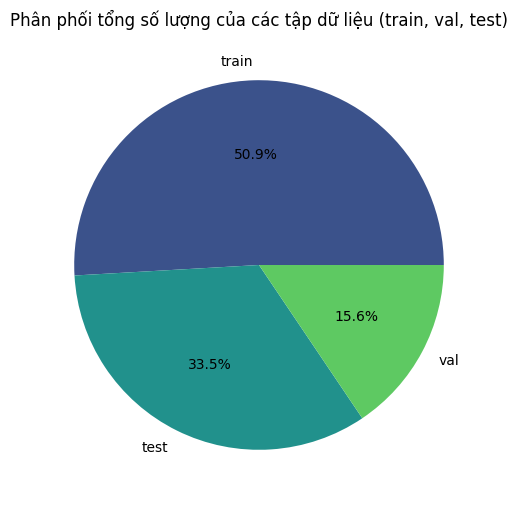

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có cột 'set' phân biệt các tập dữ liệu (train, val, test)
# Ví dụ: df['set'] = ['train', 'val', 'test']  # Phân chia theo cách thủ công hoặc sử dụng sklearn

# Tính số lượng mẫu trong từng tập dữ liệu
set_counts = df['set'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(set_counts, labels=set_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(set_counts)))
plt.title('Phân phối tổng số lượng của các tập dữ liệu (train, val, test)')
plt.show()


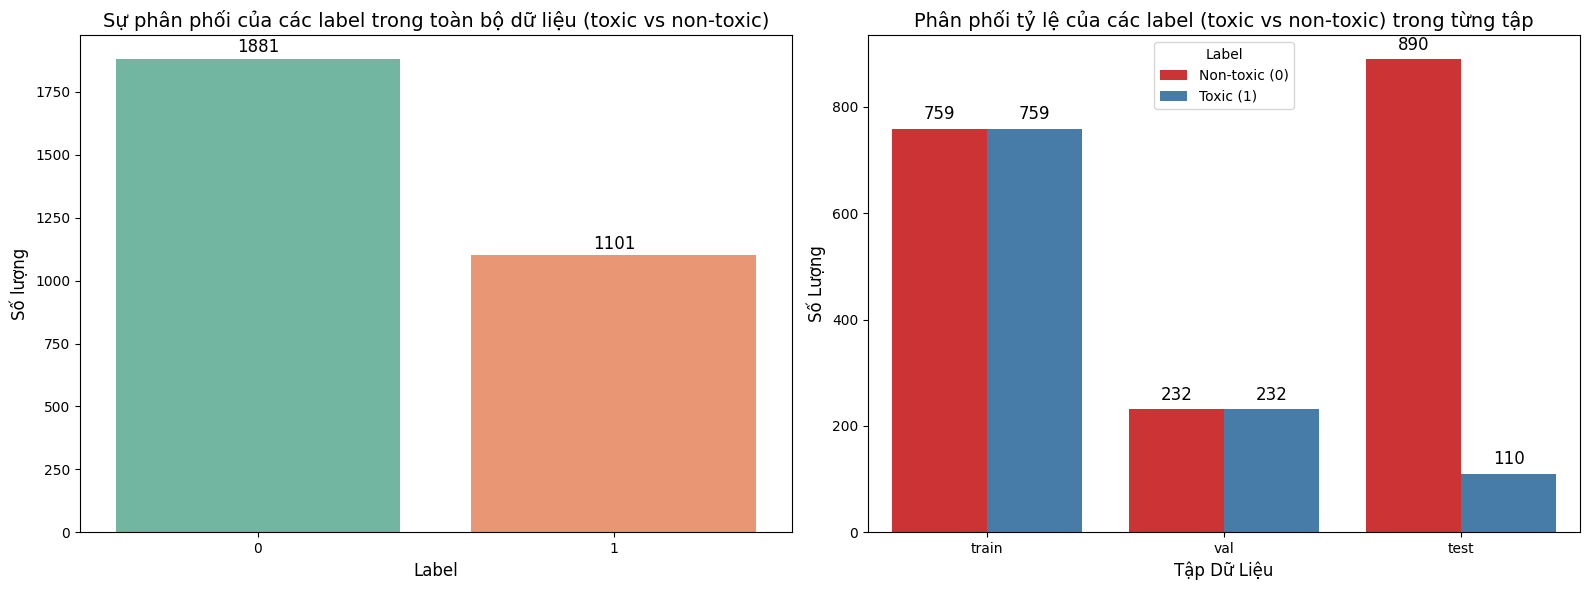

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of labels in the entire dataset
sns.countplot(x='label', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Sự phân phối của các label trong toàn bộ dữ liệu (toxic vs non-toxic)', fontsize=14)
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)

# Add counts on top of bars in Plot 1
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=12)


# Plot 2: Distribution of labels by dataset (train, val, test)
sns.countplot(x='set', hue='label', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Phân phối tỷ lệ của các label (toxic vs non-toxic) trong từng tập', fontsize=14)
axes[1].set_xlabel('Tập Dữ Liệu', fontsize=12)
axes[1].set_ylabel('Số Lượng', fontsize=12)
axes[1].legend(title='Label', labels=['Non-toxic (0)', 'Toxic (1)'])

# Add counts on top of bars in Plot 2
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=12)


# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()


label  toxic_percentage  non_toxic_percentage
set                                          
train              50.0                  50.0
val                50.0                  50.0
test               11.0                  89.0


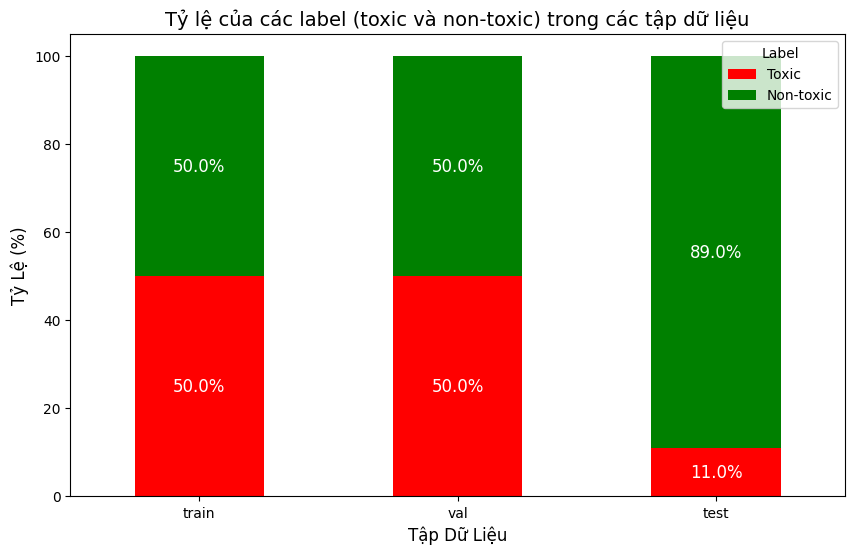

In [29]:
import matplotlib.pyplot as plt

# Tính toán tỷ lệ của từng label trong các tập
label_distribution = df.groupby(['set', 'label']).size().unstack(fill_value=0)
label_distribution['total'] = label_distribution.sum(axis=1)
label_distribution['toxic_percentage'] = label_distribution[1] / label_distribution['total'] * 100
label_distribution['non_toxic_percentage'] = label_distribution[0] / label_distribution['total'] * 100

# Đảm bảo thứ tự các cột là 'train', 'val', 'test'
label_distribution = label_distribution.loc[['train', 'val', 'test']]

# Hiển thị tỷ lệ
print(label_distribution[['toxic_percentage', 'non_toxic_percentage']])

# Vẽ biểu đồ tỷ lệ của từng label (toxic, non-toxic) trong các tập dữ liệu
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột chồng cho tỷ lệ toxic và non-toxic
ax = label_distribution[['toxic_percentage', 'non_toxic_percentage']].plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())

# Thêm tiêu đề và nhãn
plt.title('Tỷ lệ của các label (toxic và non-toxic) trong các tập dữ liệu', fontsize=14)
plt.xlabel('Tập Dữ Liệu', fontsize=12)
plt.ylabel('Tỷ Lệ (%)', fontsize=12)
plt.xticks(rotation=0)  # Giữ cho các nhãn tập không bị xoay
plt.legend(title='Label', labels=['Toxic', 'Non-toxic'])

# Thêm giá trị tỷ lệ vào biểu đồ
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()  # Lấy tọa độ của các thanh
    if height > 0:  # Chỉ thêm tỷ lệ cho các thanh có chiều cao
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=12, color='white')

# Hiển thị biểu đồ
plt.show()


In [30]:
def print_samples(df, n=5):
    """
    Hàm in ra n mẫu dữ liệu thuộc mỗi loại label trong DataFrame (chỉ in cột 'text').
    
    Parameters:
    df (DataFrame): DataFrame chứa dữ liệu với cột 'label' và 'text'
    n (int): Số lượng mẫu cần hiển thị cho mỗi label (default là 5)
    """
    # Lọc và hiển thị n mẫu dữ liệu với label 'toxic' (label = 1)
    toxic_samples = df[df['label'] == 1].head(n)
    print(f"Vài mẫu dữ liệu thuộc label 'toxic' (1):")
    print(toxic_samples['text'])  # Chỉ in cột 'text'
    print("\n" + "-"*50 + "\n")
    
    # Lọc và hiển thị n mẫu dữ liệu với label 'non-toxic' (label = 0)
    non_toxic_samples = df[df['label'] == 0].head(n)
    print(f"Vài mẫu dữ liệu thuộc label 'non-toxic' (0):")
    print(non_toxic_samples['text'])  # Chỉ in cột 'text'
    print("\n" + "-"*50 + "\n")

print_samples(df, n=10)

Vài mẫu dữ liệu thuộc label 'toxic' (1):
759    tôi thấy người lái xe hơi bấm còi mới là người...
760                       Ở đâu cũng có những kẻ dở hơi!
761    Đọc tin mà thấy căm hờnMặt người dạ thú chẳng ...
762    Cái đầm cửa Hà kiều anh trông nhạt nhẽo ...
763    Học đại học còn có mấy bạn vô ý thức, quan trọ...
764    Vậy thì luật này vẫn chưa có sức dăn đeĐã là l...
765    Trong cuộc sống của con người, tôi cũng rất gh...
766    Cách ly vĩnh viễn khỏi xã hội. Mong các cháu l...
767    Dã man quá, mất hết nhân tính rồi. Xin chia bu...
768    "Dragon Soul" gì chứ, gọi là "Tucson Soul" mới...
Name: text, dtype: object

--------------------------------------------------

Vài mẫu dữ liệu thuộc label 'non-toxic' (0):
0    Biển không thể lên thăm cầu vồng, còn cầu vồng...
1                           Tin vui nhất trong ngày!!!
2                         Không đẹp nhưng nhiu options
3    Cá nhân tôi càng thấy các cô muôn phần đẹp hơn...
4                   Sevilla thắng loạt đá luâ

In [31]:
# # Đọc stopwords từ file
# with open('data/stopwords.txt', 'r', encoding='utf-8') as f:
#     stopwords = set(f.read().splitlines())

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Khởi tạo CountVectorizer
vectorizer = CountVectorizer()

# Tạo từ điển từ cột 'text'
vectorizer.fit(df['text'])

# Tính kích thước từ điển
vocabulary_size = len(vectorizer.vocabulary_)

# In ra kích thước từ điển
print(f"Kích thước từ điển: {vocabulary_size}")


Kích thước từ điển: 4583


In [33]:
# Lấy danh sách các từ trong từ điển
vocabulary = vectorizer.vocabulary_.keys()

# In ra một số từ đầu tiên
print("Một số từ trong từ điển:", list(vocabulary)[:100])


Một số từ trong từ điển: ['biển', 'không', 'thể', 'lên', 'thăm', 'cầu', 'vồng', 'còn', 'lại', 'có', 'tin', 'vui', 'nhất', 'trong', 'ngày', 'đẹp', 'nhưng', 'nhiu', 'options', 'cá', 'nhân', 'tôi', 'càng', 'thấy', 'các', 'cô', 'muôn', 'phần', 'hơn', 'trên', 'ảnh', 'bởi', 'cái', 'tự', 'nhiên', 'nếu', 'cũng', 'rất', 'ít', 'can', 'thiệp', 'như', 'chị', 'em', 'bây', 'giờ', 'ra', 'đường', 'cứ', 'đơ', 'đớ', 'na', 'ná', 'hệt', 'nhau', 'phát', 'ngán', 'sevilla', 'thắng', 'loạt', 'đá', 'luân', 'lưu', 'trông', 'màu', 'nướng', 'tương', 'lai', 'bé', 'sẽ', 'kinh', 'doanh', 'được', 'rồi', 'con', 'trump', 'thật', 'tuyệt', 'cần', 'điều', 'tra', 'và', 'truy', 'cứu', 'trách', 'nhiệm', 'hình', 'sự', 'cả', 'người', 'mẹ', 'lẫn', 'cơ', 'sở', 'nạo', 'phá', 'thai', 'quá', 'chuẩn', 'thực']


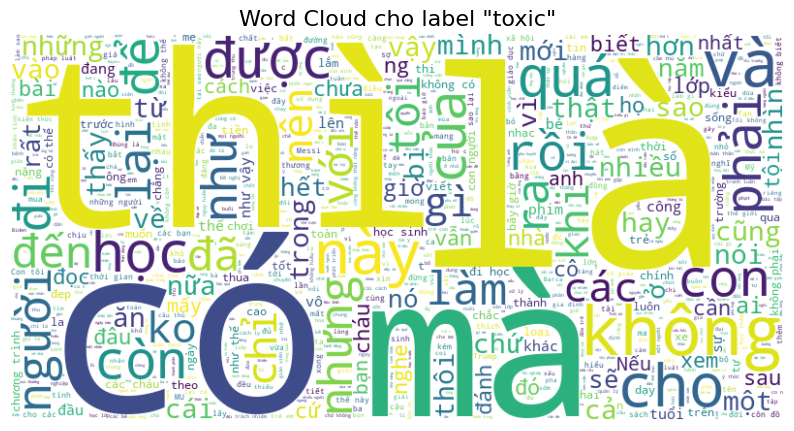

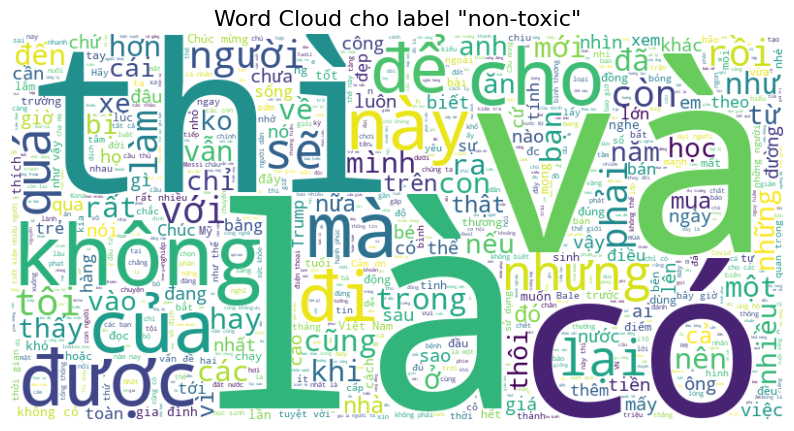

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(df, label_value, title):
    """
    Vẽ word cloud cho một label cụ thể.
    
    Parameters:
    df (DataFrame): DataFrame chứa dữ liệu với cột 'label' và 'text'
    label_value (int): Giá trị của label (1 cho toxic, 0 cho non-toxic)
    title (str): Tiêu đề của biểu đồ
    """
    # Lọc dữ liệu theo label
    text = ' '.join(df[df['label'] == label_value]['text'])
    
    # Tạo word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white",max_words=2000).generate(text)
    
    # Hiển thị word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Vẽ word cloud cho label 'toxic' (label = 1)
plot_wordcloud(df, 1, 'Word Cloud cho label "toxic"')

# Vẽ word cloud cho label 'non-toxic' (label = 0)
plot_wordcloud(df, 0, 'Word Cloud cho label "non-toxic"')


In [35]:
# Tính số lượng từ trong mỗi bình luận (count_word)
df['count_word'] = df['text'].apply(lambda x: len(x.split()))

# Kiểm tra thống kê mô tả của count_word
print(df['count_word'].describe())


count    2982.000000
mean       29.326962
std        29.753805
min         1.000000
25%        11.000000
50%        20.000000
75%        36.000000
max       336.000000
Name: count_word, dtype: float64


c:\Users\Kaisaac\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


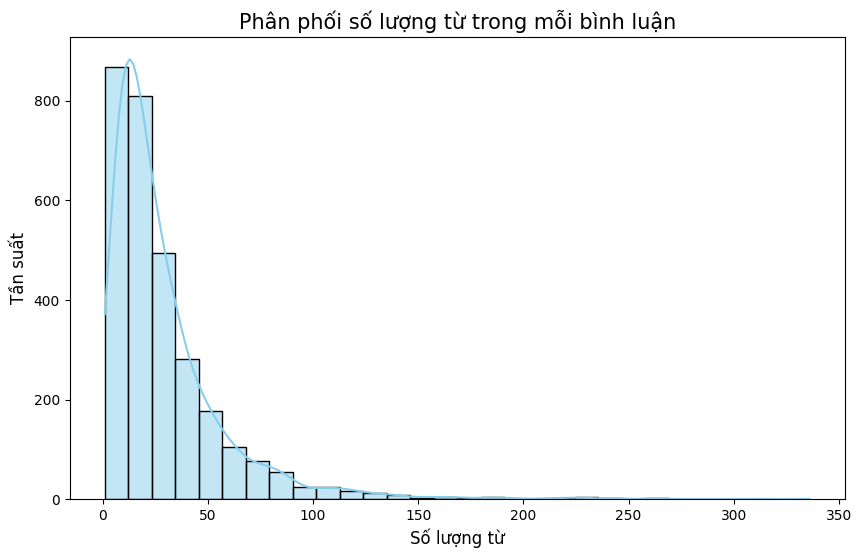

In [36]:
# Vẽ Histogram để xem phân phối số lượng từ trong toàn bộ dữ liệu
plt.figure(figsize=(10, 6))
sns.histplot(df['count_word'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối số lượng từ trong mỗi bình luận', fontsize=15)
plt.xlabel('Số lượng từ', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()


In [37]:
# Thống kê mô tả số lượng từ cho từng lớp
toxic_stats = df[df['label'] == 1]['count_word'].describe()
non_toxic_stats = df[df['label'] == 0]['count_word'].describe()

print("Thống kê số lượng từ cho lớp Toxic:")
print(toxic_stats)

print("\nThống kê số lượng từ cho lớp Non-Toxic:")
print(non_toxic_stats)


Thống kê số lượng từ cho lớp Toxic:
count    1101.000000
mean       31.658492
std        32.414890
min         2.000000
25%        12.000000
50%        22.000000
75%        39.000000
max       265.000000
Name: count_word, dtype: float64

Thống kê số lượng từ cho lớp Non-Toxic:
count    1881.000000
mean       27.962254
std        27.998483
min         1.000000
25%        11.000000
50%        19.000000
75%        35.000000
max       336.000000
Name: count_word, dtype: float64


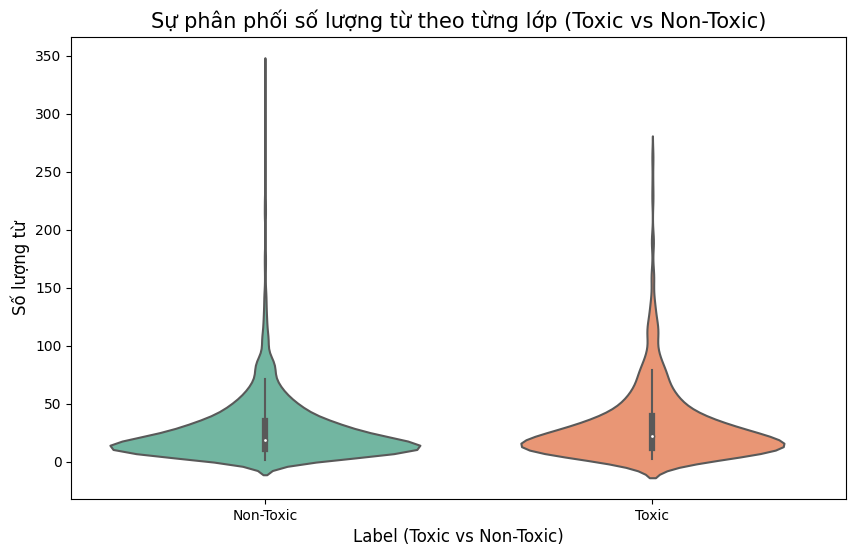

In [38]:
# Vẽ Violinplot để so sánh sự phân phối số lượng từ giữa toxic và non-toxic
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='count_word', data=df, palette='Set2', split=True)
plt.title('Sự phân phối số lượng từ theo từng lớp (Toxic vs Non-Toxic)', fontsize=15)
plt.xlabel('Label (Toxic vs Non-Toxic)', fontsize=12)
plt.ylabel('Số lượng từ', fontsize=12)
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.show()


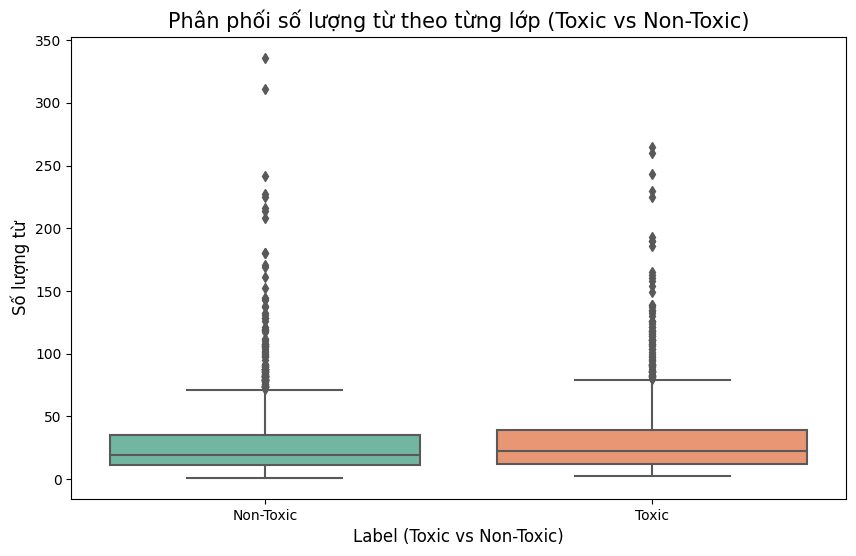

In [39]:
# Vẽ Boxplot để so sánh số lượng từ giữa toxic và non-toxic
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='count_word', data=df, palette='Set2')
plt.title('Phân phối số lượng từ theo từng lớp (Toxic vs Non-Toxic)', fontsize=15)
plt.xlabel('Label (Toxic vs Non-Toxic)', fontsize=12)
plt.ylabel('Số lượng từ', fontsize=12)
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.show()


In [40]:
# Tìm các bình luận có số lượng từ cao nhất
top_long_comments = df.sort_values(by='count_word', ascending=False).head(10)
print("Các bình luận có số lượng từ nhiều nhất:")
print(top_long_comments[['text', 'count_word']])


Các bình luận có số lượng từ nhiều nhất:
                                                   text  count_word
2776  cho mọi người chưa hiểu hết về nội dung bộ phi...         336
245   Với túi tiền khoảng tầm trên dưới 500 triệu th...         311
927   Nếu tôi là sancho tôi sẽ tự hỏi , clb có thể m...         265
1491  Tôi cảm thấy chán cho nền giáo dục, thương cho...         260
1857  Chị nói rất hay! Nhưng những người ủng hộ như ...         243
487   Mục đích của Bảo Hiểm là bảo vệ.Mỗi năm bạn tr...         242
1139  Có hiếu là một từ đã được xác định,, không thể...         230
723   Việc sử dụng điện thoại thông minh, máy tính, ...         227
619   Nhiều người tiếc 500k/tháng và đi khuyên người...         225
860   Con tôi cũng đang học chương trình cải cách gi...         225


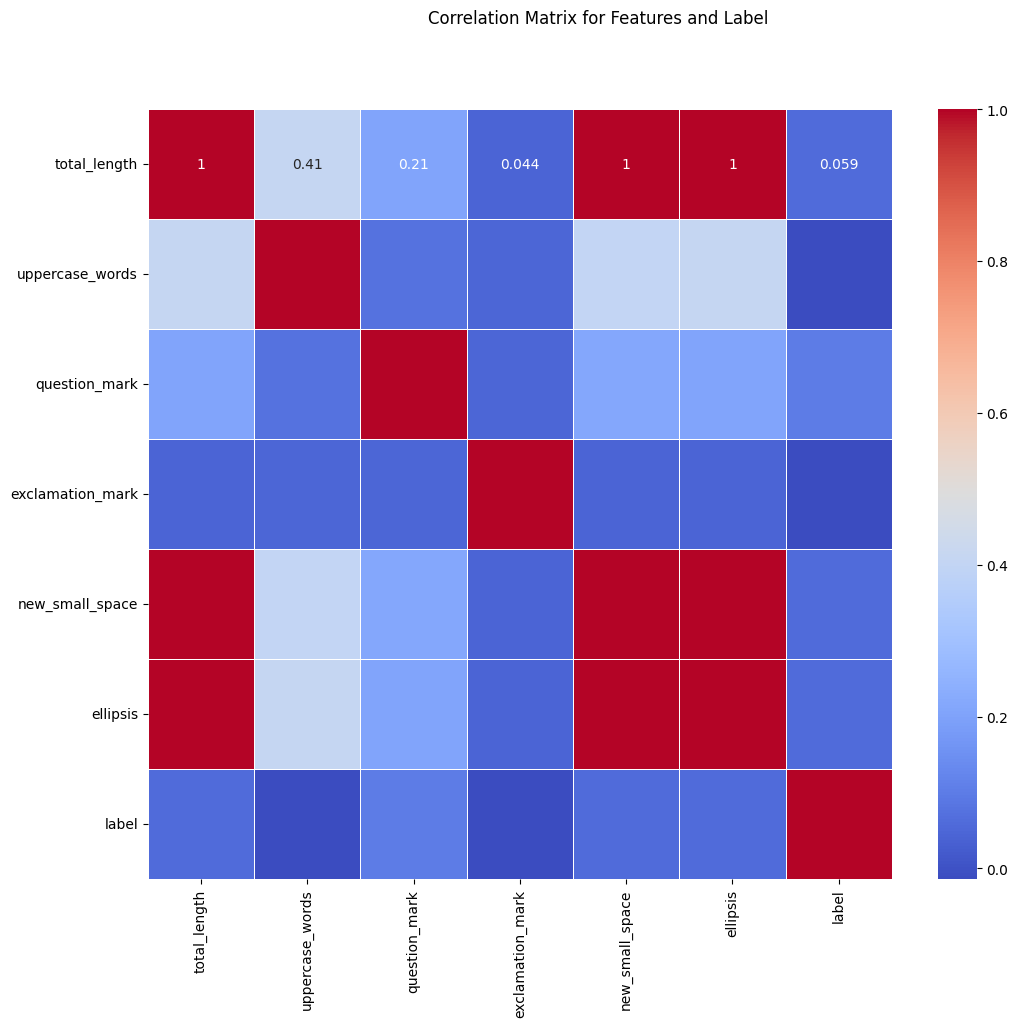

In [41]:
# Tính toán các đặc trưng
df['total_length'] = df['text'].str.len()  # Tổng độ dài của văn bản
df['uppercase_words'] = df['text'].apply(lambda l: sum(map(str.isupper, list(l))))  # Số lượng từ viết hoa
df['question_mark'] = df['text'].str.count('\?')  # Số dấu hỏi
df['exclamation_mark'] = df['text'].str.count('!')  # Số dấu chấm than
df['new_small_space'] = df['text'].str.count(' ')  # Số dấu cách (spaces)
df['ellipsis'] = df['text'].str.count('...')  # Số dấu ba chấm

# Lưu trữ các đặc trưng cần tính toán
FEATURES = ['total_length', 
            'uppercase_words', 
            'question_mark', 
            'exclamation_mark', 
            'new_small_space', 
            'ellipsis']

# Chọn các cột để vẽ ma trận tương quan
COLUMNS = FEATURES + ['label']  # Thêm cột 'label' vào để xem mối quan hệ với nhãn (toxic vs non-toxic)

# Vẽ ma trận tương quan giữa các đặc trưng và nhãn
f, ax = plt.subplots(figsize=(12, 10))
f.suptitle('Correlation Matrix for Features and Label')

# Tính toán ma trận tương quan và vẽ
sns.heatmap(df[COLUMNS].corr(), annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
plt.show()


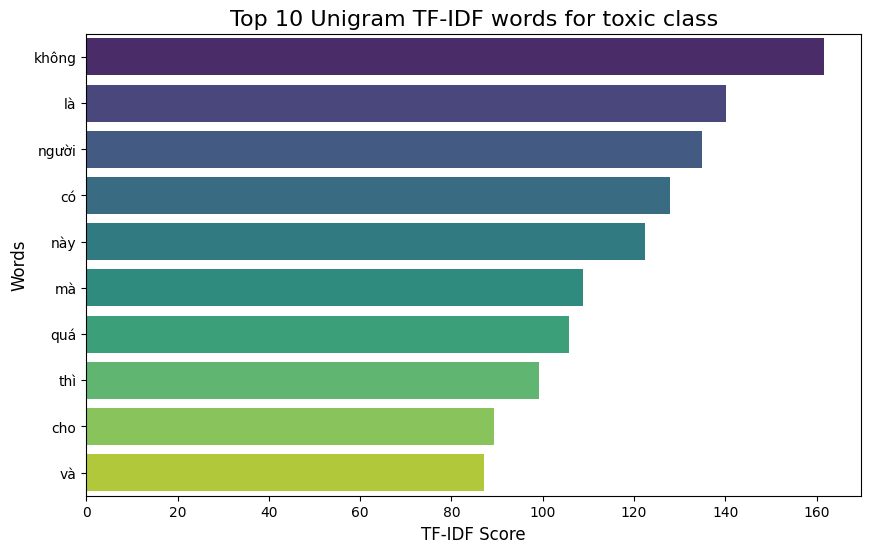

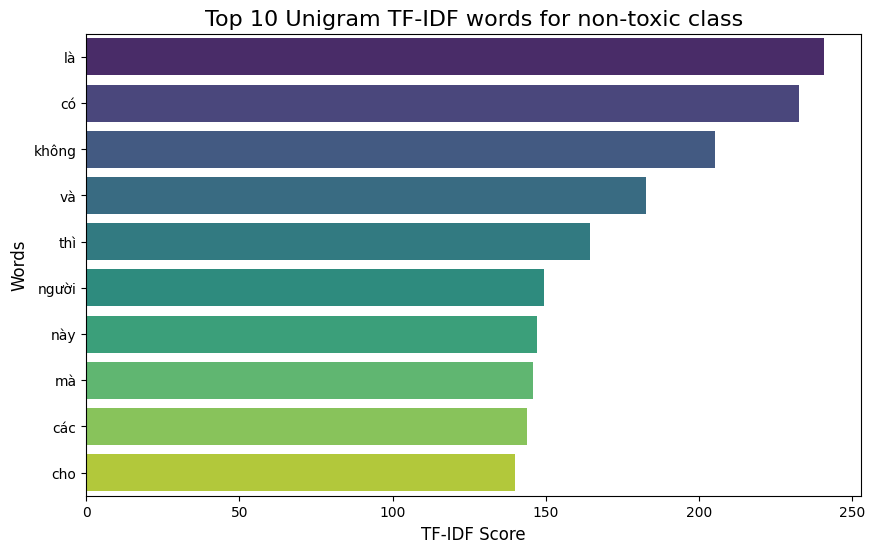

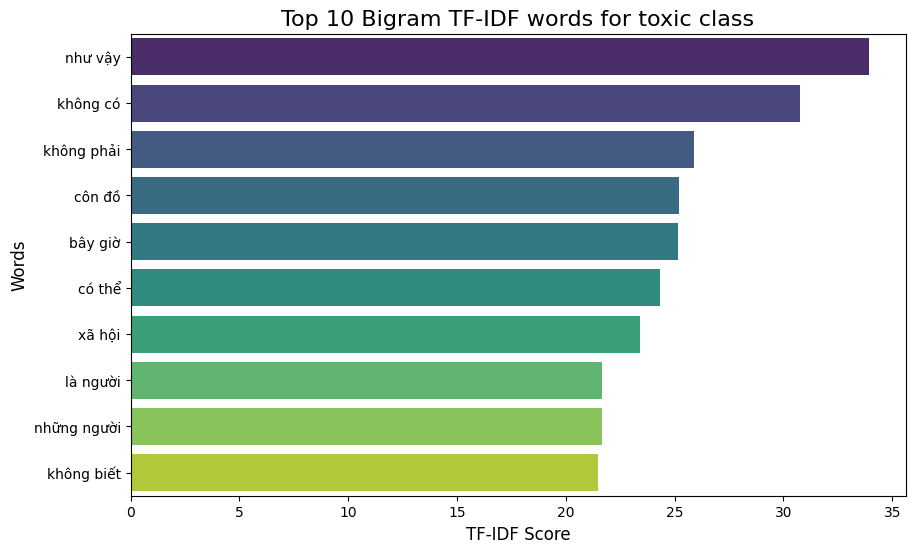

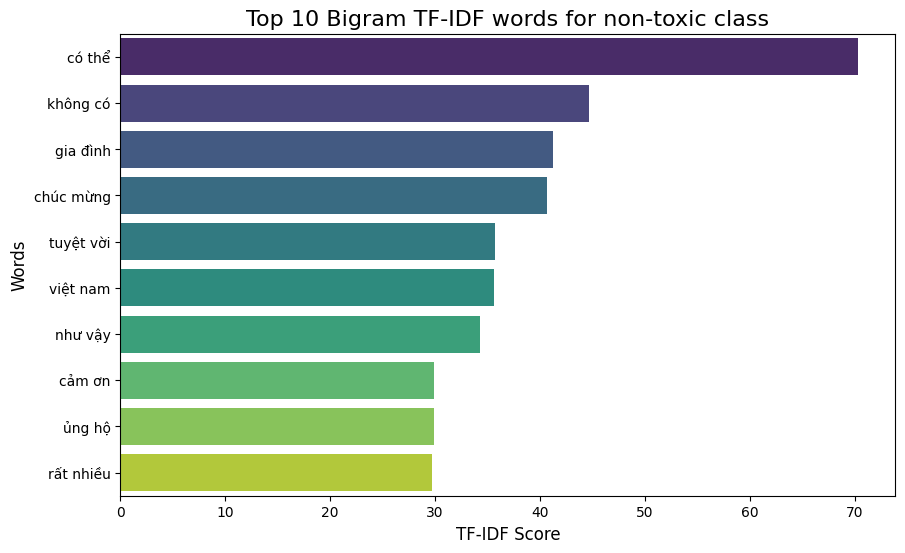

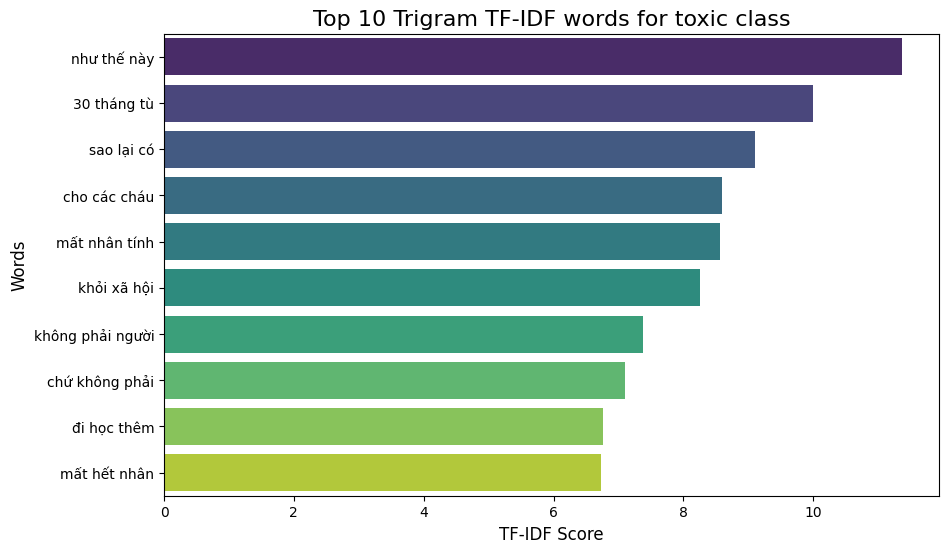

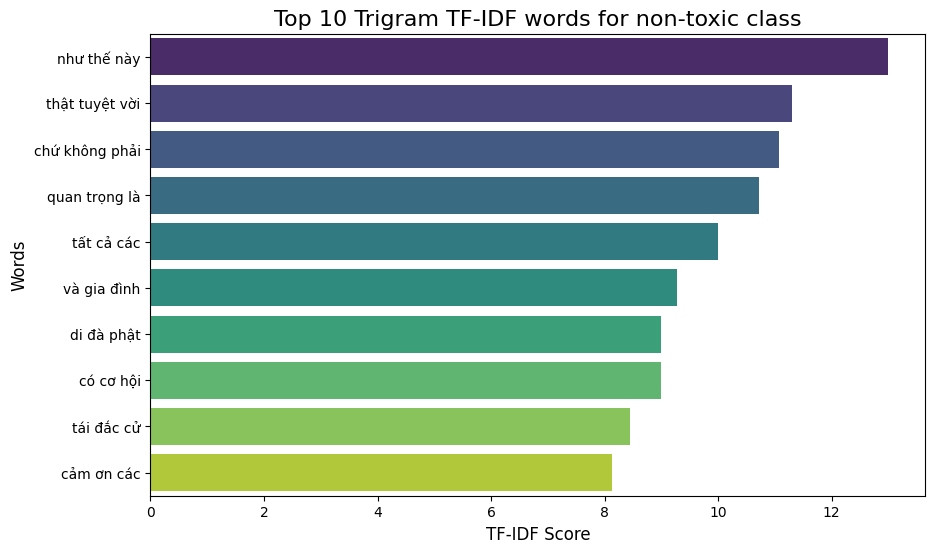

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Giả sử DataFrame df chứa các cột 'text' (văn bản) và 'label' (0: non-toxic, 1: toxic)
# Lọc dữ liệu cho mỗi class
df_toxic = df[df['label'] == 1]
df_non_toxic = df[df['label'] == 0]

def plot_tfidf(tfidf_scores, feature_names, class_name, ngram_type):
    """
    Hàm vẽ biểu đồ TF-IDF cho các từ trong mỗi lớp.
    
    Parameters:
    - tfidf_scores: Điểm TF-IDF cho từng từ
    - feature_names: Các từ (tính từ TF-IDF)
    - class_name: Tên của class (toxic / non-toxic)
    - ngram_type: Loại n-gram (unigram / bigram / trigram)
    """
    # Tạo DataFrame từ các từ và điểm TF-IDF
    tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf': tfidf_scores})
    
    # Sắp xếp theo TF-IDF giảm dần và lấy top 10 từ
    tfidf_df = tfidf_df.sort_values(by='tfidf', ascending=False).head(10)
    
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x='tfidf', y='word', data=tfidf_df, palette='viridis')
    plt.title(f'Top 10 {ngram_type} TF-IDF words for {class_name} class', fontsize=16)
    plt.xlabel('TF-IDF Score', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.show()

def calculate_tfidf(df, ngram_range, class_name):
    """
    Hàm tính toán TF-IDF và vẽ biểu đồ cho từng lớp và n-gram range.
    
    Parameters:
    - df: DataFrame chứa dữ liệu
    - ngram_range: Tuple (min_n, max_n) cho n-gram (unigram, bigram, trigram)
    - class_name: Tên của class (toxic / non-toxic)
    """
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, max_features=20)
    
    # Tính toán TF-IDF cho mỗi lớp
    if class_name == 'toxic':
        texts = df[df['label'] == 1]['text']
    else:
        texts = df[df['label'] == 0]['text']
    
    X = vectorizer.fit_transform(texts)
    tfidf_scores = np.array(X.sum(axis=0)).flatten()
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # Vẽ biểu đồ
    plot_tfidf(tfidf_scores, feature_names, class_name, 'Unigram' if ngram_range == (1, 1) else 'Bigram' if ngram_range == (2, 2) else 'Trigram')

# 1. Vẽ biểu đồ TF-IDF cho unigram (1-gram)
calculate_tfidf(df, (1, 1), 'toxic')
calculate_tfidf(df, (1, 1), 'non-toxic')

# 2. Vẽ biểu đồ TF-IDF cho bigram (2-gram)
calculate_tfidf(df, (2, 2), 'toxic')
calculate_tfidf(df, (2, 2), 'non-toxic')

# 3. Vẽ biểu đồ TF-IDF cho trigram (3-gram)
calculate_tfidf(df, (3, 3), 'toxic')
calculate_tfidf(df, (3, 3), 'non-toxic')
